In [91]:
#Load packages needed
library(broom)
library(dplyr)
library(readr)
library(tidyr)
library(ggplot2)
library(stringr)

#These data include different dog breeds' trait scores and popularity ranking (2013-2020)
#Read data files
trait<-read.csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2022/2022-02-01/breed_traits.csv")
rank<-read.csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2022/2022-02-01/breed_rank.csv")

In [92]:
#Data cleaning
#Check duplicates
trait %>% count(Breed) %>% filter(n > 1)
rank  %>% count(Breed) %>% filter(n > 1)

#Drop missing data
trait_data<-trait[complete.cases(trait),]
rank_data<-rank[complete.cases(rank),]

#Gain clean data
trait_data
rank_data

#Substract useful column only
#From the trait_data, I chose 4 dog traits which are related to social behaviors with family, children, other dogs, and strangers
#These 4 traits are: "Affectionate.With.Family", "Good.With.Young.Children", "Good.With.Other.Dogs", "Openness.To.Strangers"
#As for the ranl_data, qualitative data ("links" and"Image") were excluded
#Merge two data files by "Breed"
#Create new data needed
sub_trait<-trait_data[,c("Breed","Affectionate.With.Family","Good.With.Young.Children","Good.With.Other.Dogs","Openness.To.Strangers")]
sub_rank<-rank_data %>% select(-c("links","Image"))
sub_data<-merge(sub_trait,sub_rank,by="Breed")
sub_data
#Check column names
colnames(sub_data)


Breed,n
<chr>,<int>


Breed,n
<chr>,<int>


,Breed,Affectionate.With.Family,Good.With.Young.Children,Good.With.Other.Dogs,Shedding.Level,Coat.Grooming.Frequency,Drooling.Level,Coat.Type,Coat.Length,Openness.To.Strangers,Playfulness.Level,Watchdog.Protective.Nature,Adaptability.Level,Trainability.Level,Energy.Level,Barking.Level,Mental.Stimulation.Needs
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Retrievers (Labrador),5,5,5,4,2,2,Double,Short,5,5,3,5,5,5,3,4
2,French Bulldogs,5,5,4,3,1,3,Smooth,Short,5,5,3,5,4,3,1,3
3,German Shepherd Dogs,5,5,3,4,2,2,Double,Medium,3,4,5,5,5,5,3,5
4,Retrievers (Golden),5,5,5,4,2,2,Double,Medium,5,4,3,5,5,3,1,4
5,Bulldogs,4,3,3,3,3,3,Smooth,Short,4,4,3,3,4,3,2,3
6,Poodles,5,5,3,1,4,1,Curly,Long,5,5,5,4,5,4,4,5
7,Beagles,3,5,5,3,2,1,Smooth,Short,3,4,2,4,3,4,4,4
8,Rottweilers,5,3,3,3,1,3,Smooth,Short,3,4,5,4,5,3,1,5
9,Pointers (German Shorthaired),5,5,4,3,2,2,Smooth,Short,4,4,4,4,5,5,3,5


,Breed,X2013.Rank,X2014.Rank,X2015.Rank,X2016.Rank,X2017.Rank,X2018.Rank,X2019.Rank,X2020.Rank,links,Image
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,Retrievers (Labrador),1,1,1,1,1,1,1,1,https://www.akc.org/dog-breeds/labrador-retriever/,https://www.akc.org/wp-content/uploads/2017/11/Labrador-Retriever-illustration.jpg
2,French Bulldogs,11,9,6,6,4,4,4,2,https://www.akc.org/dog-breeds/french-bulldog/,https://www.akc.org/wp-content/uploads/2017/11/French-Bulldog-Illo-2.jpg
3,German Shepherd Dogs,2,2,2,2,2,2,2,3,https://www.akc.org/dog-breeds/german-shepherd-dog/,https://www.akc.org/wp-content/uploads/2017/11/German-Shepherd-Dog-Illo-2.jpg
4,Retrievers (Golden),3,3,3,3,3,3,3,4,https://www.akc.org/dog-breeds/golden-retriever/,https://www.akc.org/wp-content/uploads/2017/11/Golden-Retriever-Illo-2.jpg
5,Bulldogs,5,4,4,4,5,5,5,5,https://www.akc.org/dog-breeds/bulldog/,https://www.akc.org/wp-content/uploads/2017/11/Bulldog-Illo-2.jpg
6,Poodles,8,7,8,7,7,7,6,6,https://www.akc.org/dog-breeds/poodle-standard/,https://www.akc.org/wp-content/uploads/2017/11/Standard-Poodle-illustration.jpg
7,Beagles,4,5,5,5,6,6,7,7,https://www.akc.org/dog-breeds/beagle/,https://www.akc.org/wp-content/uploads/2017/11/Beagle-Illo-2.jpg
8,Rottweilers,9,10,9,8,8,8,8,8,https://www.akc.org/dog-breeds/rottweiler/,https://www.akc.org/wp-content/uploads/2017/11/Rottweiler-Illo-2.jpg
9,Pointers (German Shorthaired),13,12,11,11,10,9,9,9,https://www.akc.org/dog-breeds/german-shorthaired-pointer/,https://www.akc.org/wp-content/uploads/2017/11/German-Shorthaired-Pointer-Illo-2.jpg


Breed,Affectionate.With.Family,Good.With.Young.Children,Good.With.Other.Dogs,Openness.To.Strangers,X2013.Rank,X2014.Rank,X2015.Rank,X2016.Rank,X2017.Rank,X2018.Rank,X2019.Rank,X2020.Rank
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Affenpinschers,3,3,3,5,143,144,136,149,147,148,152,163
Akitas,3,3,1,2,45,46,46,46,47,47,47,48
Basenjis,3,3,3,3,85,86,87,88,84,87,88,86
Beagles,3,5,5,3,4,5,5,5,6,6,7,7
Beaucerons,3,3,3,2,152,145,142,140,141,124,123,121
Bloodhounds,4,3,3,3,48,50,49,52,50,49,51,46
Borzois,3,3,3,3,99,102,89,98,102,103,107,103
Boxers,4,5,3,4,7,8,10,10,11,11,14,14
Briards,3,3,3,3,127,132,130,132,127,132,137,150


[1] "Breed"                    "Affectionate.With.Family"
 [3] "Good.With.Young.Children" "Good.With.Other.Dogs"    
 [5] "Openness.To.Strangers"    "X2013.Rank"              
 [7] "X2014.Rank"               "X2015.Rank"              
 [9] "X2016.Rank"               "X2017.Rank"              
[11] "X2018.Rank"               "X2019.Rank"              
[13] "X2020.Rank"

In [93]:
#Summary statistics of selected traits
sub_data %>% summarise(
  Family_mean=mean(Affectionate.With.Family,na.rm = TRUE),
  Family_sd=sd(Affectionate.With.Family,na.rm = TRUE),
  Children_mean=mean(Good.With.Young.Children,na.rm = TRUE),
  Children_sd=sd(Good.With.Young.Children,na.rm = TRUE),
  Dogs_mean=mean(Good.With.Other.Dogs,na.rm = TRUE),
  Dogs_sd=sd(Good.With.Other.Dogs,na.rm = TRUE),
  Strangers_mean=mean(Openness.To.Strangers,na.rm = TRUE),
  Strangers_sd=sd(Openness.To.Strangers,na.rm = TRUE)
)

Family_mean,Family_sd,Children_mean,Children_sd,Dogs_mean,Dogs_sd,Strangers_mean,Strangers_sd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.44186,0.795892,3.813953,1.074727,3.418605,0.9058686,3.534884,0.9089197


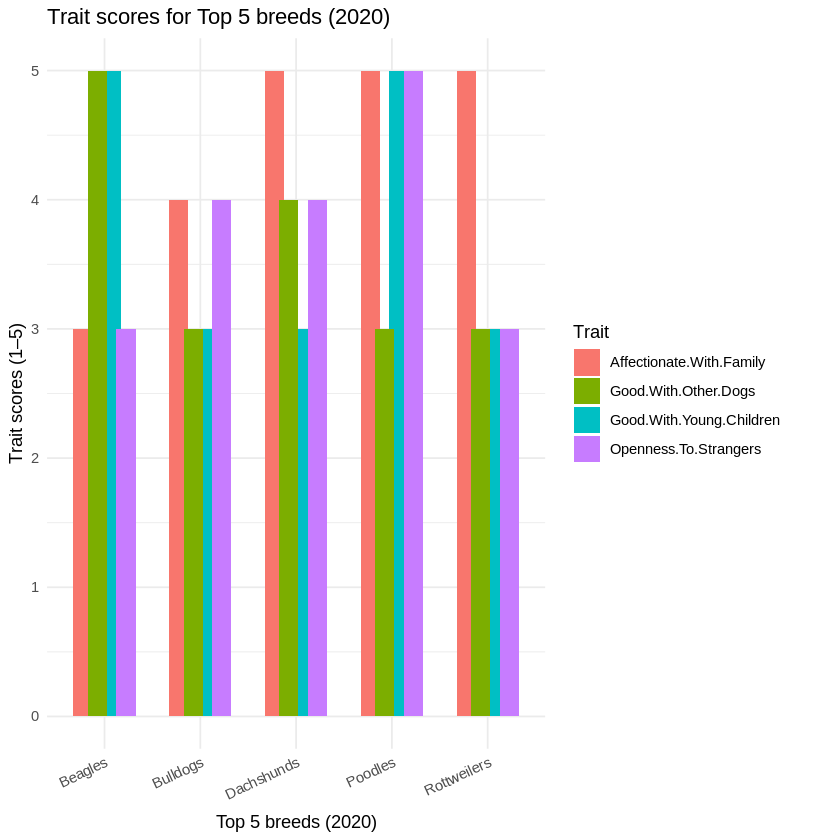

In [94]:
#Using the column chart to show 4 selected traits' scores among top 5 (2020) breeds
#Select top5 breeds in the 2020 ranking
top5 <- sub_data %>%
  arrange(X2020.Rank) %>%
  slice(1:5)
#Pivot data into a long format
top5_long <- top5 %>%
  select(Breed,
         Affectionate.With.Family,
         Good.With.Young.Children,
         Good.With.Other.Dogs,
         Openness.To.Strangers) %>%
pivot_longer(
    cols = -Breed,
    names_to = "trait",
    values_to = "score"
  )
  #Plot column chart
  ggplot(top5_long, aes(x = Breed, y = score, fill = trait)) +
  geom_col(position = position_dodge(width = 0.6), width = 0.8) +
  labs(title = "Trait scores for Top 5 breeds (2020)",
       x = "Top 5 breeds (2020)", y = "Trait scores (1–5)", fill = "Trait") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 25, hjust = 1))



Call:
lm(formula = Affectionate.With.Family ~ X2020.Rank, data = sub_data)

Coefficients:
(Intercept)   X2020.Rank  
  4.4587647   -0.0002132  



Call:
lm(formula = Good.With.Young.Children ~ X2020.Rank, data = sub_data)

Coefficients:
(Intercept)   X2020.Rank  
   4.073583    -0.003275  



Call:
lm(formula = Good.With.Other.Dogs ~ X2020.Rank, data = sub_data)

Coefficients:
(Intercept)   X2020.Rank  
  3.4288778   -0.0001296  



Call:
lm(formula = Openness.To.Strangers ~ X2020.Rank, data = sub_data)

Coefficients:
(Intercept)   X2020.Rank  
   3.695499    -0.002026  


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”


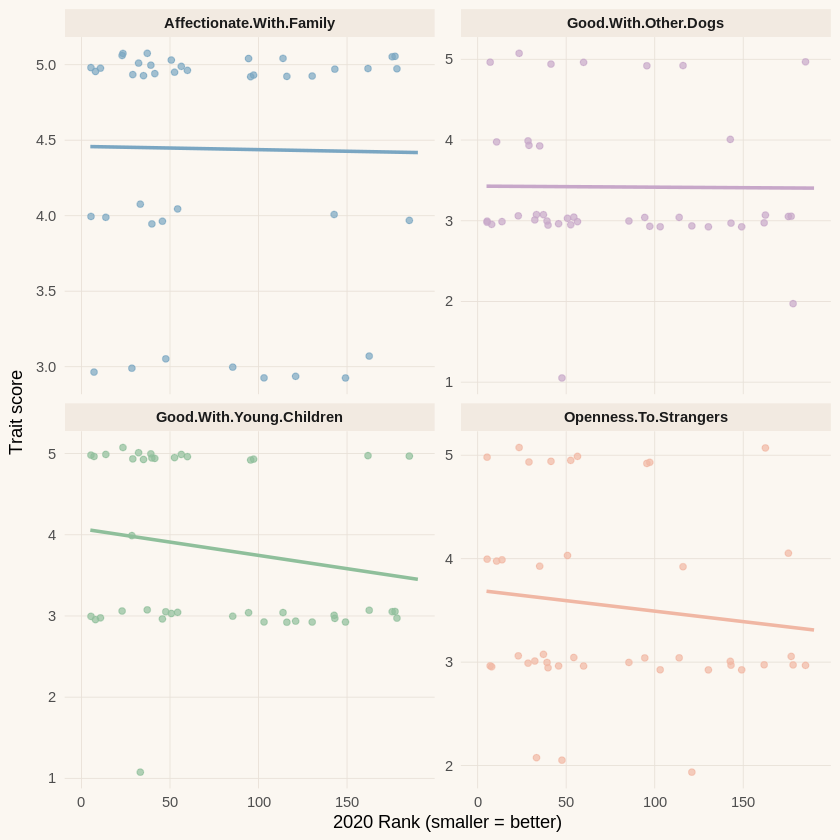

In [95]:
#Here I came back to all breeds data
#Linear models: how 2020 ranking predicts 4 traits scores
lm(Affectionate.With.Family ~ X2020.Rank, data = sub_data)
lm(Good.With.Young.Children ~ X2020.Rank, data = sub_data)
lm(Good.With.Other.Dogs ~ X2020.Rank, data = sub_data)
lm(Openness.To.Strangers ~ X2020.Rank, data = sub_data)

#Assign color to 4 traits
#I chose some colors in works of Claude Monet, my favorite painter
traits_plot <- c(
  "Affectionate.With.Family"   = "#7AA6C2",
  "Good.With.Young.Children"   = "#8FBF9B",
  "Good.With.Other.Dogs"       = "#C7A7C9",
  "Openness.To.Strangers"      = "#F0B7A4"
)

#Pivot data into a long format
sub_data_long <- sub_data %>%
  select(Breed, X2020.Rank,
         Affectionate.With.Family,
         Good.With.Young.Children,
         Good.With.Other.Dogs,
         Openness.To.Strangers) %>%
  pivot_longer(
    cols = -c(Breed, X2020.Rank),
    names_to = "trait_all",
    values_to = "score_all"
  )

#Use 4 scatter plots to show how ranking (2020) predict different traits
ggplot(sub_data_long, aes(x = X2020.Rank, y = score_all, color = trait_all)) +
  geom_jitter(alpha = 0.7, width = 1, height = 0.08) +
  geom_smooth(method = "lm", se = FALSE, linewidth = 1) +
  facet_wrap(~ trait_all, scales = "free_y") +
  scale_x_continuous(
    limits = c(0, max(sub_data_long$X2020.Rank, na.rm = TRUE)),
    breaks = scales::pretty_breaks(n = 6)
  ) +
  scale_color_manual(values = traits_plot) +
  guides(color = "none") +
  labs(x = "2020 Rank (smaller = better)",
       y = "Trait score") +
theme_minimal() +
#Adjust plot appearance

   theme(
    plot.background  = element_rect(fill = "#FBF7F1", colour = NA),#I chose some mild colors as background
    panel.background = element_rect(fill = "#FBF7F1", colour = NA),
    panel.grid.major = element_line(linewidth = 0.25, colour = "#E8E1D8"),
    panel.grid.minor = element_blank(),
    strip.background = element_rect(fill = "#F2EAE1", colour = NA),
    strip.text       = element_text(face = "bold")
   )


In [96]:
#Multiple regression model：combine 4 traits to predict 2020 popularity rank
model_df <- sub_data %>%
  dplyr::select( #select needed variables only
    X2020.Rank,
    Affectionate.With.Family,
    Good.With.Young.Children,
    Good.With.Other.Dogs,
    Openness.To.Strangers
  ) %>%
  tidyr::drop_na() #drop missing data
#Fit the regression model
#Coefficient for association of each trait with rank(2020), while keeping other three traits constant
trait_lm <- lm(
  X2020.Rank ~ `Affectionate.With.Family` +
    `Good.With.Young.Children` +
    `Good.With.Other.Dogs` +
    `Openness.To.Strangers`,
  data = model_df
)
#Report regression coefficients
coef_tbl <- data.frame(
  term = names(coef(trait_lm)),
  estimate = as.numeric(coef(trait_lm))
)
#Report model fit statistics
fit_tbl <- data.frame(
  n = nobs(trait_lm),
  r_squared = summary(trait_lm)$r.squared,
  adj_r_squared = summary(trait_lm)$adj.r.squared
)
#Print the results
summary(trait_lm)
coef_tbl
fit_tbl


Call:
lm(formula = X2020.Rank ~ Affectionate.With.Family + Good.With.Young.Children + 
    Good.With.Other.Dogs + Openness.To.Strangers, data = model_df)

Residuals:
   Min     1Q Median     3Q    Max 
-82.47 -42.98 -23.34  40.44 113.39 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)
(Intercept)               100.123     60.661   1.651    0.107
Affectionate.With.Family    3.944     12.829   0.307    0.760
Good.With.Young.Children  -10.672     10.834  -0.985    0.331
Good.With.Other.Dogs        6.609     11.737   0.563    0.577
Openness.To.Strangers      -5.728     12.821  -0.447    0.658

Residual standard error: 60.75 on 38 degrees of freedom
Multiple R-squared:  0.04486,	Adjusted R-squared:  -0.05568 
F-statistic: 0.4462 on 4 and 38 DF,  p-value: 0.7745


term,estimate
<chr>,<dbl>
(Intercept),100.123101
Affectionate.With.Family,3.943501
Good.With.Young.Children,-10.672425
Good.With.Other.Dogs,6.608877
Openness.To.Strangers,-5.728483


n,r_squared,adj_r_squared
<int>,<dbl>,<dbl>
43,0.04485926,-0.05568187


trait_20,estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Affectionate.With.Family,0.12612613,4.459459,4.333333,0.3518188,0.7358305,6.666854,-0.7302489,0.9825012,Welch Two Sample t-test,two.sided
Good.With.Other.Dogs,-0.09459459,3.405405,3.500000,-0.2529239,0.8074467,7.148265,-0.9752688,0.7860796,Welch Two Sample t-test,two.sided
Good.With.Young.Children,-0.21621622,3.783784,4.000000,-0.4491516,0.6675116,6.689215,-1.3653273,0.9328948,Welch Two Sample t-test,two.sided
Openness.To.Strangers,-0.34684685,3.486486,3.833333,-1.0101369,0.3430155,7.725784,-1.1435693,0.4498756,Welch Two Sample t-test,two.sided


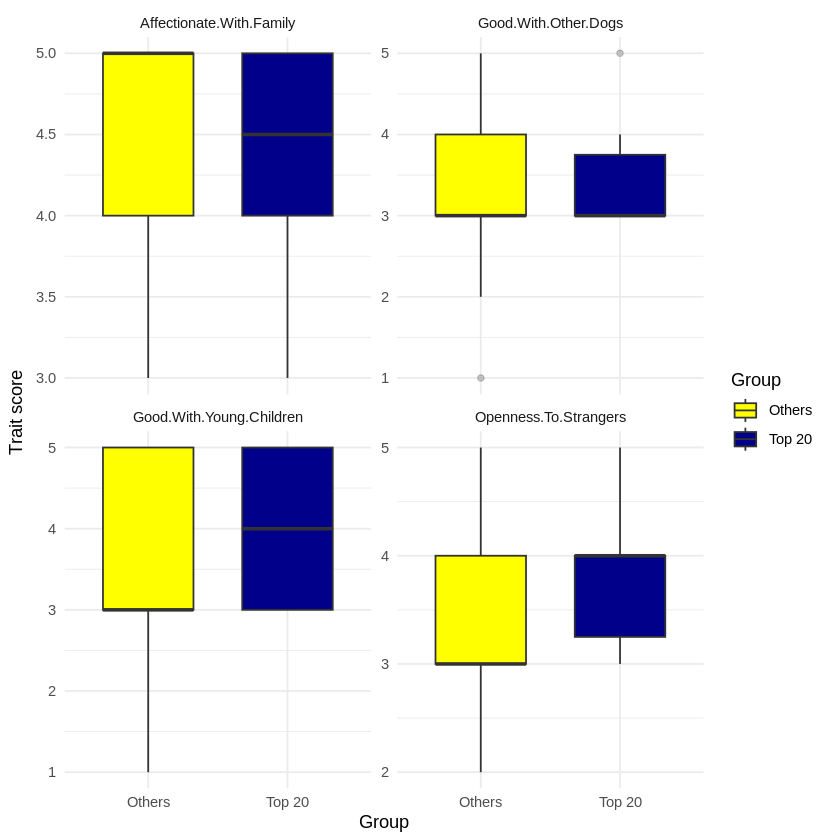

In [97]:
#Using t-test to test potential different traits' scores between Top 20 breeds (2020) and other breeds and visualizing by the boxplot
#Create two groups
rank_20<-sub_data%>%
mutate(rank_group = if_else(X2020.Rank <= 20, "Top 20", "Others"))
#Pivot data into a long format
rank_20_long <- rank_20 %>%
  pivot_longer(
    cols = c(Affectionate.With.Family,Good.With.Young.Children,Good.With.Other.Dogs,Openness.To.Strangers),
,names_to = "trait_20", values_to = "score_20")
#Run the t-test
ttest_tbl <- rank_20_long %>%
  group_by(trait_20) %>%
  do(broom::tidy(t.test(score_20 ~ rank_group, data = ., na.action = na.omit))) %>%
  ungroup() #remove grouping
ttest_tbl #print t-test results
#Create boxplots to visualize group differences
ggplot(rank_20_long, aes(x = rank_group, y = score_20, fill = rank_group)) +
  geom_boxplot(outlier.alpha = 0.25, width = 0.65) +
  facet_wrap(~ trait_20, scales = "free_y") +
  scale_fill_manual(
    values = c("Top 20" = "#00008B", "Others" = "#FFFF00"), #Here I chose two representative colors of TC: yellow and blue
    name = "Group"
  ) +
  labs(x = "Group", y = "Trait score") +
  theme_minimal() +
  theme(legend.position = "right") #add legend on the right

trait,term,df,sumsq,meansq,statistic,p.value
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Affectionate.With.Family,group,2,0.1879845,0.09399225,0.1423226,0.8677786
Affectionate.With.Family,Residuals,40,26.4166667,0.66041667,NA,NA
Good.With.Other.Dogs,group,2,0.6651163,0.33255814,0.3935599,0.6772345
Good.With.Other.Dogs,Residuals,40,33.8000000,0.84500000,NA,NA
Good.With.Young.Children,group,2,2.0949612,1.04748062,0.9026763,0.4135824
Good.With.Young.Children,Residuals,40,46.4166667,1.16041667,NA,NA
Openness.To.Strangers,group,2,2.2810078,1.14050388,1.4073056,0.2566609
Openness.To.Strangers,Residuals,40,32.4166667,0.81041667,NA,NA


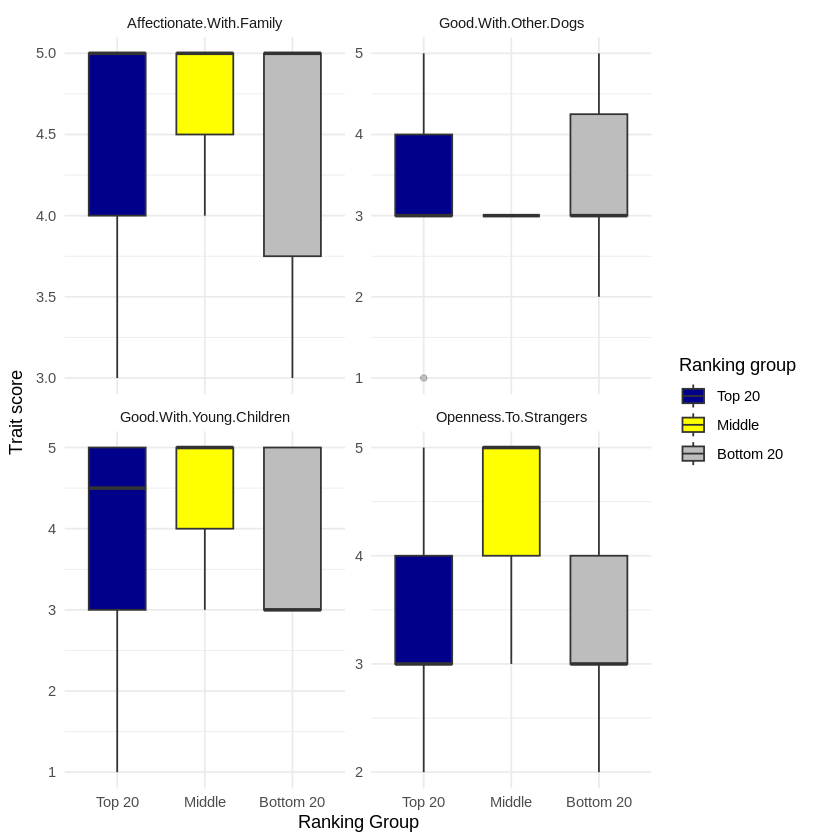

In [98]:
#Using ANOVA to compare trait score difference among 3 groups: top 20, bottom 20, and other breeds in 2020 ranking
#Create one long format data for ANOVA
long_anova<-sub_data %>%
  arrange(X2020.Rank) %>%
  mutate(group = case_when( #Create 3 groups
    row_number() <= 20 ~ "Top 20",
    row_number() > n() - 20 ~ "Bottom 20",
    TRUE ~ "Middle"
  )) %>%
  pivot_longer(cols = c(Affectionate.With.Family,
    Good.With.Young.Children,
    Good.With.Other.Dogs,
    Openness.To.Strangers), names_to = "trait", values_to = "score") %>%
  drop_na(score) %>% #drop missing data
  mutate(group = factor(group, levels = c("Top 20", "Middle", "Bottom 20")))
#Run the ANOVA test
anova_tbl <- long_anova %>%
  group_by(trait) %>%
  group_modify(~ broom::tidy(stats::aov(score ~ group, data = .x))) %>%
  ungroup() #remove grouping
anova_tbl #print the results
#Assign colors for 3 groups
color_anova <- c("Top 20"   = "#00008B",  # dark blue
           "Middle"  = "#FFFF00",  # yellow
           "Bottom 20" = "#BDBDBD")# gray
#Using boxplots to visualize 3 group differences
ggplot(long_anova, aes(x = group, y = score, fill = group)) +
  geom_boxplot(width = 0.65, outlier.alpha = 0.25, show.legend = TRUE) +
  facet_wrap(~ trait, scales = "free_y") +
  scale_fill_manual(values = color_anova, name = "Ranking group") +
  labs(x = "Ranking Group", y = "Trait score") +
  theme_minimal() +
  theme(legend.position = "right") #Add legend to the right



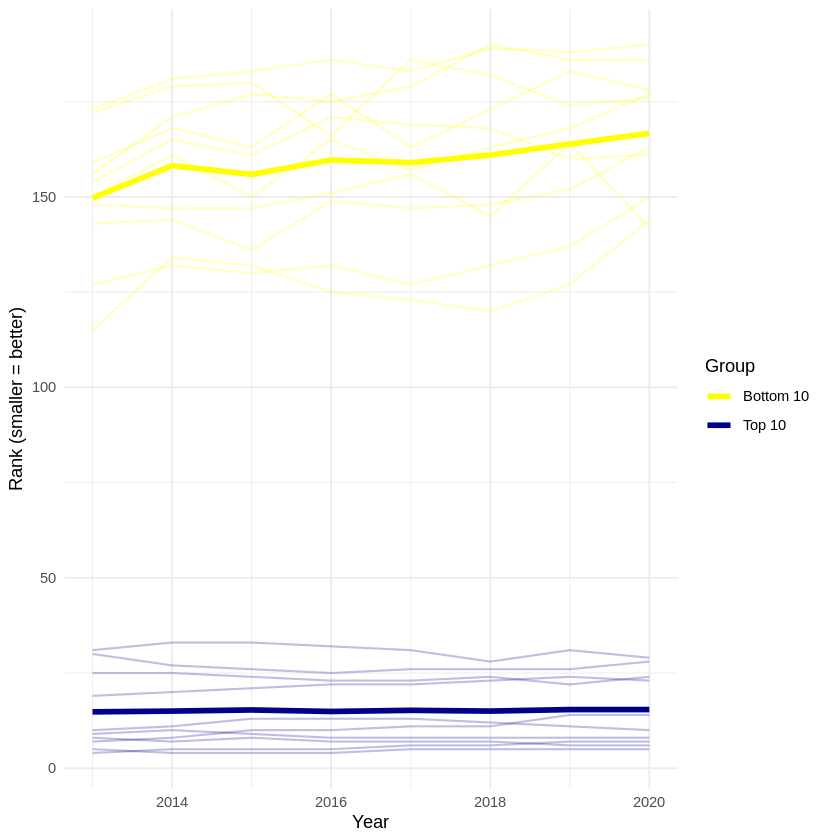

In [99]:
#Using line graph to show ranking history from 2013-2020 for top 10 and bottom 10 breeds (2020)
#Using bold line to show the change of mean for each group
#Assign color to each group
color_history <- c("Top 10"="#00008B","Bottom 10"="#FFFF00")
#Create long formatting data for the line graph with 2 groups
long_rank <- sub_data %>%
  arrange(X2020.Rank) %>%
  mutate(group10 = case_when(
    row_number() <= 10 ~ "Top 10",
    row_number() > n() - 10 ~ "Bottom 10",
    TRUE ~ NA_character_
  )) %>%
  filter(!is.na(group10)) %>%                            # Keep top 10/bottom 10 only
  pivot_longer(cols = c(X2013.Rank,X2014.Rank,X2015.Rank,X2016.Rank,X2017.Rank,X2018.Rank,X2019.Rank,X2020.Rank), names_to="rank_year", values_to="rank") %>%
  mutate(
    year = as.integer(str_extract(rank_year, "\\d{4}")), # extract year
  ) %>%
  filter(!is.na(rank))                                   # drop missing yearly ranks
#Summarise means
sum_rank <- long_rank %>%
  group_by(group10, year) %>%
  summarise(mean_rank = mean(rank), .groups="drop")
#Create line graph
ggplot() +
  geom_line(data=long_rank, aes(year, rank, group=Breed, color=group10), alpha=.25, linewidth=.6) +
  geom_line(data=sum_rank, aes(year, mean_rank, color=group10), linewidth=1.6) +
  scale_color_manual(values=color_history, name="Group") +
  labs(x="Year", y="Rank (smaller = better)") +
  theme_minimal()
